In [10]:
from os import walk
recpath = 'imagens_vq/teste'
recfiles = next(walk(recpath), (None, None, []))[2]

In [11]:
import csv
import numpy as np
allpoints = []

for i in range(0, len(recfiles)):
    file = open('performance_' + str(i) + '.csv')
    p_df = csv.reader(file)
    points = []
    for row in p_df:
        points.append(row[0:4])
    points = np.array(points)
    points = points.astype(float)
    
    allpoints.append(points)

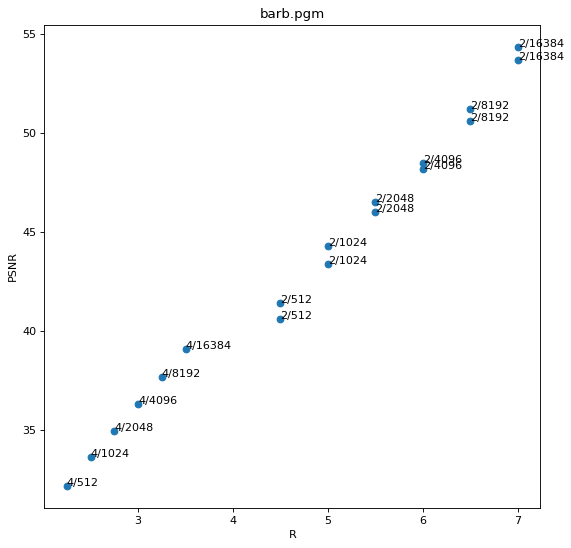

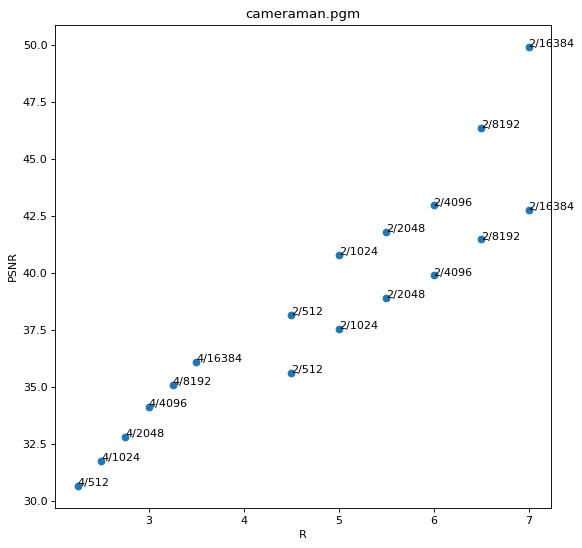

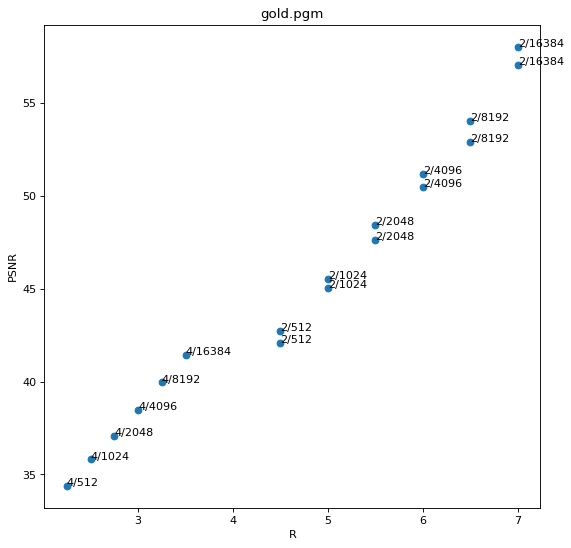

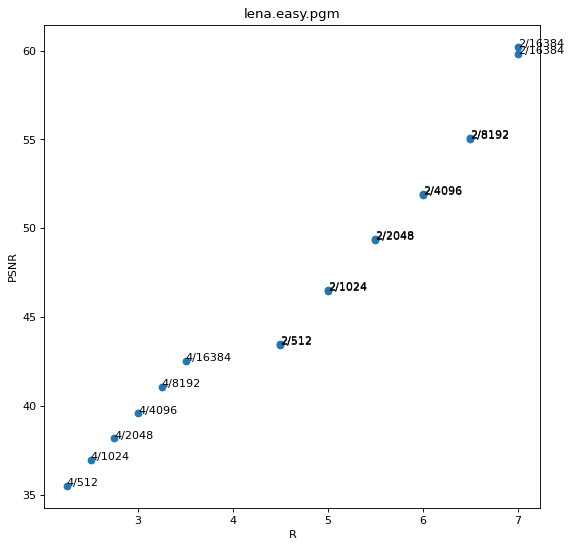

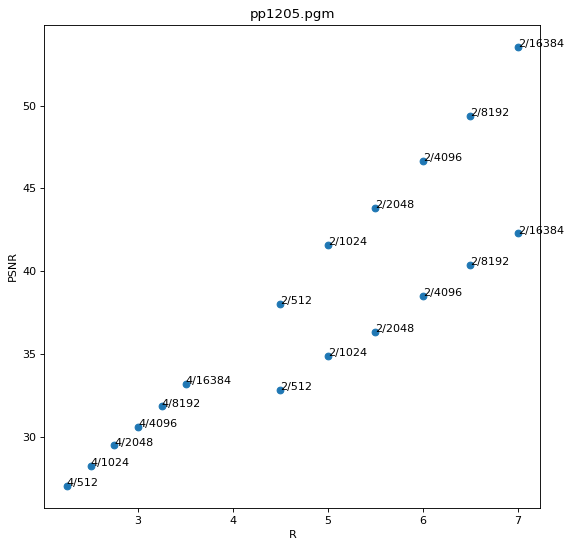

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
for j in range(0, len(recfiles)):
    points = allpoints[j]
    figure(figsize=(8, 8), dpi=80)
    plt.scatter(points[:, 3], points[:, 2])
    plt.title(recfiles[j])
    plt.xlabel("R")
    plt.ylabel("PSNR")
    for i in range(0, len(points)):
        plt.text(points[i, 3],points[i, 2],  str(int(points[i, 0])) + '/' + str(int(points[i, 1])))
    plt.show()